In [38]:
#import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,6)
from sklearn import preprocessing


%matplotlib inline

In [3]:
#load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape
test.shape
#stats of the predictor variable (saleprice)
train.SalePrice.describe().round(2)

count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

skew is 1.88287575977


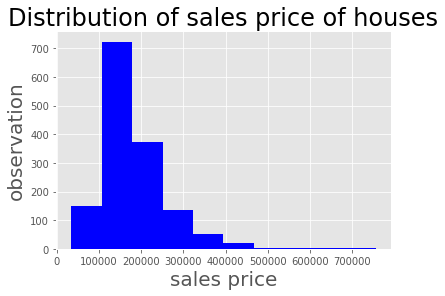

In [5]:
#analysing the distribution of sale price
print('skew is', train.SalePrice.skew())   
plt.hist(train['SalePrice'], color= 'b')

plt.title('Distribution of sales price of houses', fontsize = 24)
plt.ylabel('observation', fontsize = 20)
plt.xlabel('sales price', fontsize = 20)

plt.show()

In [6]:
#log transforming sale price to transform it into gaussian distribution
# we apply log because log shrinks the original values
target = np.log(train.SalePrice)

skew is 0.121335062205


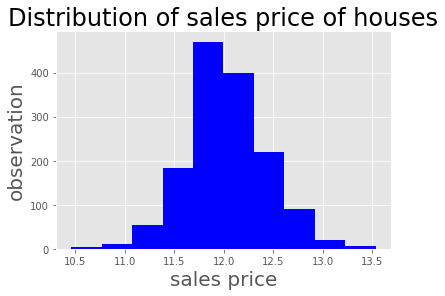

In [7]:
#earlier value was +vely skewed because mean is around 180,000
#after log it is normal distributed around mean
print('skew is', target.skew())
plt.hist(target, color= 'b')

plt.title('Distribution of sales price of houses', fontsize = 24)
plt.ylabel('observation', fontsize = 20)
plt.xlabel('sales price', fontsize = 20)

plt.show()

In [8]:
#seeking only the numeric features from the data
numeric_features = train.select_dtypes(include = [np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

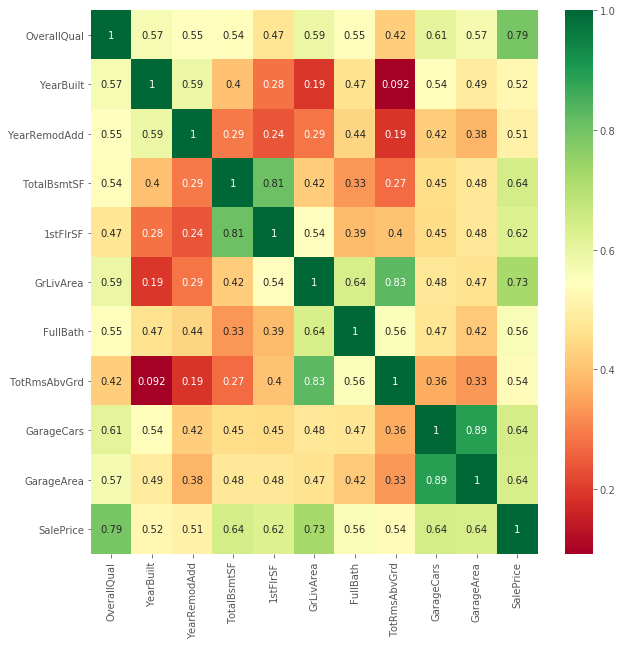

In [39]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
#features with the most correlation with the predictor variable
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending = False)[:5], '\n')
print(corr['SalePrice'].sort_values(ascending = False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [10]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [11]:
#pivot table of Overall Quality & Sale price
quality_pivot = train.pivot_table(index= 'OverallQual', values= 'SalePrice')

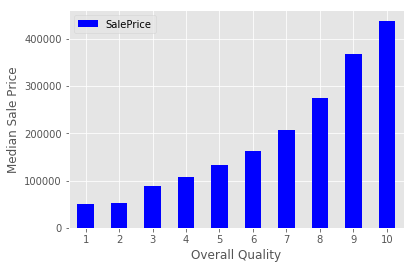

In [12]:
#plotting the pivot table
quality_pivot.plot(kind = 'bar', color = 'blue')

plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

In [13]:
#removing the outliers
train = train[train['GarageArea'] < 1200]

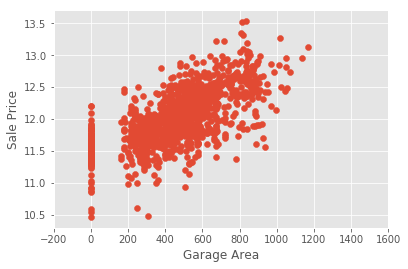

In [14]:
plt.scatter(x = train['GarageArea'], y = np.log(train.SalePrice))

plt.xlim(-200, 1600)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

In [15]:
#checking the null values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls[:5]

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689


In [16]:
print('Unique values are:', train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [17]:
#Analysing the categorical data
categoricals = train.select_dtypes(exclude= [np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [18]:
#Type of road to house
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [19]:
#One-hot encoding to convert the categorical data into integer data
train['enc_street'] = pd.get_dummies(train.Street, drop_first= True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first= True)

In [20]:
#Encoding into 1 and 0
print('Encoded: \n')
print(train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


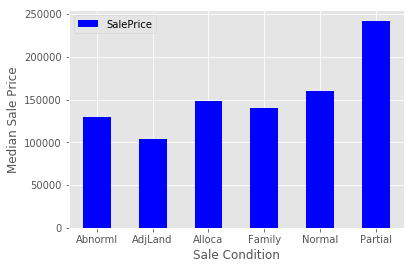

In [21]:
#Analysing - Sale Condition
condition_pivot = train.pivot_table(index= 'SaleCondition', values= 'SalePrice', aggfunc= np.median)

condition_pivot.plot(kind= 'bar', color = 'blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

In [22]:
def encode(x): 
    if x == 'Partial':
        return 1
    else:
        return 0

In [23]:
#Treating partial as one class and all other sale condition as other
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

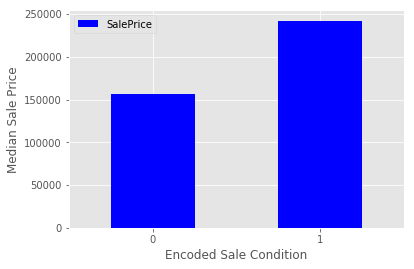

In [24]:
condition_pivot = train.pivot_table(index= 'enc_condition', values= 'SalePrice', aggfunc= np.median)

condition_pivot.plot(kind= 'bar', color = 'blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

In [25]:
#Handling the missing values by interpolation
data = train.select_dtypes(include= [np.number]).interpolate().dropna()

In [26]:
#Verifying missing values
sum(data.isnull().sum() != 0)

0

In [27]:
#log transforming the target variable to improve the linearity of the regression
y = np.log(train.SalePrice)
#dropping the target variable and the index from the training set
X = data.drop(['SalePrice', 'Id'], axis = 1)

In [28]:
#splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = .33)

In [29]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition
1101,20,61.000000,9758,5,5,1971,1971,0.0,412,287,...,0,0,0,0,0,0,7,2007,1,0
845,85,87.500000,16647,5,5,1975,1981,0.0,1390,0,...,0,0,0,0,0,0,1,2007,1,0
615,85,80.000000,8800,6,7,1963,1963,156.0,763,0,...,0,0,0,0,0,0,5,2010,1,0
1324,20,75.000000,9986,8,5,2006,2007,428.0,0,0,...,49,0,0,0,0,0,2,2007,1,1
308,30,98.666667,12342,4,5,1940,1950,0.0,262,0,...,0,0,0,0,0,0,3,2009,1,0
461,70,60.000000,7200,7,9,1936,2007,0.0,350,210,...,0,0,0,0,0,0,4,2009,1,0
1292,70,60.000000,6600,5,4,1892,1965,0.0,0,0,...,287,0,0,0,0,0,12,2009,1,0
549,60,75.000000,9375,7,5,2003,2004,0.0,0,0,...,182,0,0,0,0,0,11,2009,1,0
606,20,82.000000,12464,5,5,1996,1996,0.0,732,0,...,0,0,0,0,0,0,11,2009,1,0
1203,20,75.000000,9750,7,5,2000,2001,171.0,0,0,...,234,0,0,0,0,0,10,2009,1,0


In [30]:
len(X_test)

481

In [31]:
#Linear regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [32]:
#fitting linear regression on the data
model = lr.fit(X_train, y_train)

In [33]:
#R square value
print('R square is: {}'.format(model.score(X_test, y_test)))

R square is: 0.8882477709262668


In [34]:
#predicting on the test set
predictions = model.predict(X_test)

In [35]:
#evaluating the model on mean square error
from sklearn.metrics import mean_squared_error, accuracy_score
print('RMSE is {}'.format(mean_squared_error(y_test, predictions)))

RMSE is 0.01784179451956573


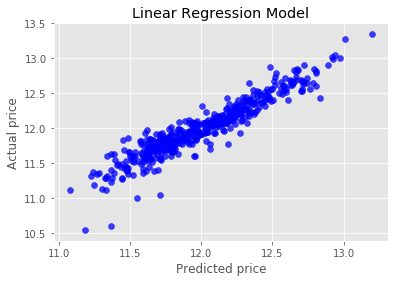

In [36]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha= 0.75, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.show()